In [3]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# Hyper parameters
input_size = 28 * 28
num_classes = 10
num_epoches = 5
batch_size = 100
learning_rate = 0.001

In [5]:
# load and normalize MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = dsets.MNIST(root='../../data/', 
                            train=True, 
                            download=True,
                            transform=transform)
test_dataset = dsets.MNIST(root='../../data/', 
                           train=False,
                           transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True, 
                                           num_workers=2)

test_loader = torch.utils.data.DataLoader(test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False, 
                                          num_workers=2)

In [6]:
def imshow(img, title=None, mean=0, std=1):
    npimg = img.numpy().transpose((1, 2, 0))
    npimg = std * npimg + mean
    npimg = np.clip(npimg, 0, 1)
    plt.imshow(npimg)
                                  
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

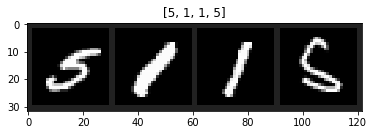

In [7]:
images, labels = next(iter(train_loader))

# visualize the first batch
out = torchvision.utils.make_grid(images[0:4])

mean = np.array([0.1307])
std = np.array([0.3081])

imshow(out, title=[x for x in labels[0:4]], mean=mean, std=std)

In [8]:
# define linear regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        return self.linear(x)

In [9]:
model = LogisticRegression(input_size, num_classes)

criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [10]:
# train model
for epoch in range(num_epoches):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = model(images)
        
        # convert labels to one-hot
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
                   % (epoch+1, num_epoches, i+1, len(train_dataset)//batch_size, loss.data[0]))

Epoch: [1/5], Step: [100/600], Loss: 1.5721
Epoch: [1/5], Step: [200/600], Loss: 1.1734
Epoch: [1/5], Step: [300/600], Loss: 0.9085
Epoch: [1/5], Step: [400/600], Loss: 0.8274
Epoch: [1/5], Step: [500/600], Loss: 0.8248
Epoch: [1/5], Step: [600/600], Loss: 0.7622
Epoch: [2/5], Step: [100/600], Loss: 0.7436
Epoch: [2/5], Step: [200/600], Loss: 0.7067
Epoch: [2/5], Step: [300/600], Loss: 0.4487
Epoch: [2/5], Step: [400/600], Loss: 0.5511
Epoch: [2/5], Step: [500/600], Loss: 0.5725
Epoch: [2/5], Step: [600/600], Loss: 0.6066
Epoch: [3/5], Step: [100/600], Loss: 0.5047
Epoch: [3/5], Step: [200/600], Loss: 0.5773
Epoch: [3/5], Step: [300/600], Loss: 0.5401
Epoch: [3/5], Step: [400/600], Loss: 0.6050
Epoch: [3/5], Step: [500/600], Loss: 0.4565
Epoch: [3/5], Step: [600/600], Loss: 0.5225
Epoch: [4/5], Step: [100/600], Loss: 0.4758
Epoch: [4/5], Step: [200/600], Loss: 0.4445
Epoch: [4/5], Step: [300/600], Loss: 0.4916
Epoch: [4/5], Step: [400/600], Loss: 0.4446
Epoch: [4/5], Step: [500/600], L

In [19]:
# Test the Model
correct = 0
total = 0
test_pred = []
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    test_pred.extend(predicted)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 88 %


### Viewing model prediction examples

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:

1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with highest probability that are correct)
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)
5. The most uncertain labels (ie those with probability closest to 0.5).



In [22]:
test_dataset.test_data.size()
test_dataset.test_labels.size()
len(test_pred)

10000

In [39]:
test_full_loader = torch.utils.data.DataLoader(test_dataset, 
                                               batch_size=test_dataset.test_data.size(0),
                                               shuffle=False,
                                               num_workers=4)

In [32]:
#1 A few correct labels at random
from numpy.random import random, permutation 

n_view = 5

correct = np.where(test_dataset.test_labels.numpy() == test_pred)[0]
idx = torch.LongTensor(permutation(correct)[:n_view])

In [40]:
test_images, test_labels = next(iter(test_full_loader))

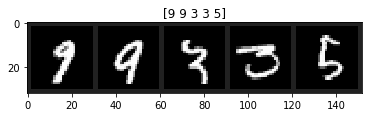

In [66]:
out = torchvision.utils.make_grid(test_images[idx])
imshow(out, test_labels[idx].numpy(), mean, std)

In [63]:
torch.LongTensor(test_pred)[1]

2

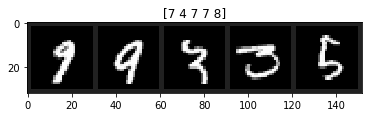

In [65]:
#2 A few incorrect labels at random
correct = np.where(test_dataset.test_labels.numpy() != test_pred)[0]
idx = torch.LongTensor(permutation(correct)[:n_view])

out = torchvision.utils.make_grid(test_images[idx])
imshow(out, torch.LongTensor(test_pred)[idx].numpy(), mean, std)